In [1]:
# Importing Libraries

import numpy as np # For Handling Arrays in Python
import pandas as pd # For Data Importing and Handling

# For Graphing
import matplotlib.pyplot as plt
import seaborn as sns

import os # For tracking files and folders

# scikit-learn imports
from sklearn.pipeline import Pipeline # For running tasks simultaneously

# For Cross Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer # For Feature Extraction from Text

# Machine Learning Algorithms
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder # For Encoding Text Data
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score # Performance Metrics for the Algorithm

# Walking through thr directory
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./Informative Tweets.ipynb
./Taranpreet Report.docx
./test.csv
./train.csv
./.ipynb_checkpoints\Informative Tweets-checkpoint.ipynb


In [2]:
# Importing the dataset
data = pd.read_csv('train.csv').drop(columns = 'Id')

In [3]:
# Viewing the dataset for an idea for the features and appearance
data.head(5)

,Text,Label
0,Official death toll from #covid19 in the Unite...,INFORMATIVE
1,"Dearest Mr. President @USER 1,169 coronavirus ...",INFORMATIVE
2,Latest Updates March 20 ⚠️5274 new cases and 3...,INFORMATIVE
3,真把公主不当干部 BREAKING: 21 people on Grand Princess...,INFORMATIVE
4,OKLAHOMA CITY — The State Department of Educat...,UNINFORMATIVE


In [4]:
# Checking the dataset shape for number of rows and columns i.e., instances and features
data.shape

(6936, 2)

In [5]:
# Dropping duplicate data instances from the dataset to increase data quality
data.drop_duplicates(inplace = True)

In [6]:
# Checking for any null data instances in the dataset
data.isnull().sum()

Text     0
Label    0
dtype: int64

In [7]:
# Viewing the dataset for an idea for the features and appearance
# Monitoring the changes
data.head(5)

,Text,Label
0,Official death toll from #covid19 in the Unite...,INFORMATIVE
1,"Dearest Mr. President @USER 1,169 coronavirus ...",INFORMATIVE
2,Latest Updates March 20 ⚠️5274 new cases and 3...,INFORMATIVE
3,真把公主不当干部 BREAKING: 21 people on Grand Princess...,INFORMATIVE
4,OKLAHOMA CITY — The State Department of Educat...,UNINFORMATIVE


In [8]:
# Monitoring the changes
data.shape

(6929, 2)

In [9]:
# Statistically analysing the dataset's features
data.describe()

,Text,Label
count,6929,6929
unique,6929,2
top,"Why there’s still no single, accurate coronavi...",UNINFORMATIVE
freq,1,3659


In [10]:
# The metadata for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6929 entries, 0 to 6935
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    6929 non-null   object
 1   Label   6929 non-null   object
dtypes: object(2)
memory usage: 162.4+ KB


In [11]:
# Splitting the dataset's features and outputs
X = data.drop('Label', axis = 1)
y = data['Label']

In [12]:
X.head(5)

,Text
0,Official death toll from #covid19 in the Unite...
1,"Dearest Mr. President @USER 1,169 coronavirus ..."
2,Latest Updates March 20 ⚠️5274 new cases and 3...
3,真把公主不当干部 BREAKING: 21 people on Grand Princess...
4,OKLAHOMA CITY — The State Department of Educat...


In [13]:
y.head(5)

0      INFORMATIVE
1      INFORMATIVE
2      INFORMATIVE
3      INFORMATIVE
4    UNINFORMATIVE
Name: Label, dtype: object

In [14]:
# Splitting the dataset into Training and testing datasets for cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [15]:
# Extracting features from the text in the dataset
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train['Text'])
X_train_counts.shape

(4850, 16921)

In [16]:
# Converting the extracted features into a matrix of TF-IDF features
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(4850, 16921)

# Bernoulli Naive Bayes Algorithm

In [17]:
# Initializing a Pipeline for Simultaneous Execution
bnb = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', BernoulliNB())])
bnb = bnb.fit(X_train['Text'], y_train)

In [18]:
# Prediction from the Machine Learning algorithm
bnb_pred = bnb.predict(X_test['Text']) # Returns the predicted output
bnb_pred_proba = bnb.predict_proba(X_test['Text'])[:, 1] # Returns the probability estimates for the features in the test set

# Support Vector Machine Algorithm

In [19]:
svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('svm', SVC(probability=True))])
svm = svm.fit(X_train['Text'], y_train)

In [20]:
svm_pred = svm.predict(X_test['Text']) # Returns the predicted output
svm_pred_proba = svm.predict_proba(X_test['Text'])[:, 1] # Returns the probability estimates for the features in the test set

# Decision Tree Algorithm

In [21]:
dt = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('dt', tree.DecisionTreeClassifier())])
dt = dt.fit(X_train['Text'], y_train)

In [22]:
dt_pred = dt.predict(X_test['Text']) # Returns the predicted output
dt_pred_proba = dt.predict_proba(X_test['Text'])[:, 1] # Returns the probability estimates for the features in the test set

# Performance Metrics

In [23]:
print("For Bernoulli NB: ", accuracy_score(y_test, bnb_pred))
print("For SVC: ", accuracy_score(y_test, svm_pred))
print("For Decision Tree: ", accuracy_score(y_test, dt_pred))

For Bernoulli NB:  0.8167388167388168
For SVC:  0.8508898508898509
For Decision Tree:  0.7195767195767195


In [24]:
bnb_cm = confusion_matrix(y_test, bnb_pred)
svm_cm = confusion_matrix(y_test, svm_pred)
dt_cm = confusion_matrix(y_test, dt_pred)

<AxesSubplot:>

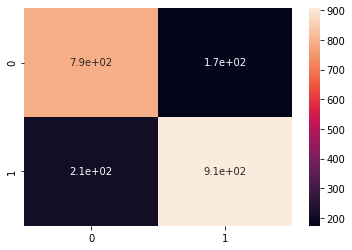

In [25]:
# Confusion Matrix for Bernoulli NB
sns.heatmap(bnb_cm, annot=True)

<AxesSubplot:>

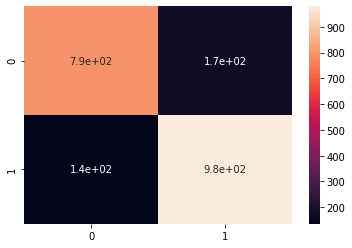

In [26]:
# Confusion Matrix for SVM
sns.heatmap(svm_cm, annot=True)

<AxesSubplot:>

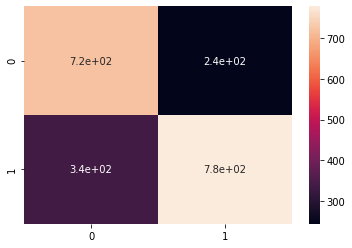

In [27]:
# Confusion Matrix for Decision Tree
sns.heatmap(dt_cm, annot=True)

In [28]:
print("For Bernoulli NB: ", classification_report(y_test, bnb_pred))
print("For SVM: ", classification_report(y_test, svm_pred))
print("For Decision Tree: ", classification_report(y_test, dt_pred))

For Bernoulli NB:                 precision    recall  f1-score   support

  INFORMATIVE       0.79      0.82      0.81       964
UNINFORMATIVE       0.84      0.81      0.83      1115

     accuracy                           0.82      2079
    macro avg       0.82      0.82      0.82      2079
 weighted avg       0.82      0.82      0.82      2079

For SVM:                 precision    recall  f1-score   support

  INFORMATIVE       0.85      0.82      0.84       964
UNINFORMATIVE       0.85      0.88      0.86      1115

     accuracy                           0.85      2079
    macro avg       0.85      0.85      0.85      2079
 weighted avg       0.85      0.85      0.85      2079

For Decision Tree:                 precision    recall  f1-score   support

  INFORMATIVE       0.68      0.75      0.71       964
UNINFORMATIVE       0.76      0.70      0.73      1115

     accuracy                           0.72      2079
    macro avg       0.72      0.72      0.72      2079
 weighte

In [29]:
le = LabelEncoder()
y_test = le.fit_transform(y_test)

In [30]:
bnb_fpr, bnb_tpr, bnb_thresholds = roc_curve(y_test, bnb_pred_proba)
svm_fpr, svm_tpr, svm_thresholds = roc_curve(y_test, svm_pred_proba)
dt_fpr, dt_tpr, dt_thresholds = roc_curve(y_test, dt_pred_proba)

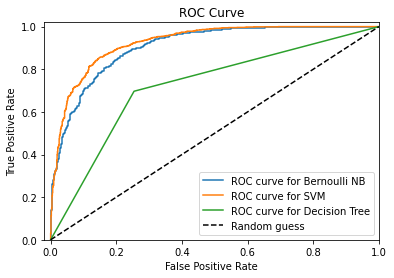

In [31]:
plt.plot(bnb_fpr, bnb_tpr, label='ROC curve for Bernoulli NB')
plt.plot(svm_fpr, svm_tpr, label='ROC curve for SVM')
plt.plot(dt_fpr, dt_tpr, label='ROC curve for Decision Tree')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")

In [32]:
print("For Bernoulli NB: ", roc_auc_score(y_test, bnb_pred_proba))
print("For SVM: ", roc_auc_score(y_test, svm_pred_proba))
print("For Decision Tree: ", roc_auc_score(y_test, dt_pred_proba))

For Bernoulli NB:  0.9070502204938318
For SVM:  0.9263504084252833
For Decision Tree:  0.7213558044768621


In [33]:
# 10-fold Cross-validation for the Algorithms

bnb_scores = cross_val_score(bnb, X_train.values.reshape(4850), y_train.values.reshape(4850), cv=10)
svm_scores = cross_val_score(svm, X_train.values.reshape(4850), y_train.values.reshape(4850), cv=10)
dt_scores = cross_val_score(dt, X_train.values.reshape(4850), y_train.values.reshape(4850), cv=10)

In [34]:
# Five outputs in a list for each algorithm since cv=5 for cross_val_score

print("For Bernoulli NB: ", bnb_scores)
print("For SVM: ", svm_scores)
print("For Decision Tree: ", dt_scores)

For Bernoulli NB:  [0.79381443 0.82268041 0.81443299 0.81649485 0.82061856 0.82268041
 0.82061856 0.82061856 0.8371134  0.81649485]
For SVM:  [0.83092784 0.84329897 0.84536082 0.84329897 0.84536082 0.82474227
 0.8371134  0.83917526 0.84742268 0.81443299]
For Decision Tree:  [0.75257732 0.73814433 0.71340206 0.73608247 0.7443299  0.76701031
 0.67835052 0.75876289 0.76082474 0.76494845]
